In [1]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np

<Axes: >

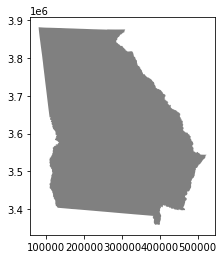

In [2]:
state = ox.geocode_to_gdf('Georgia, US')
ox.project_gdf(state).plot(fc='gray', ec='none')

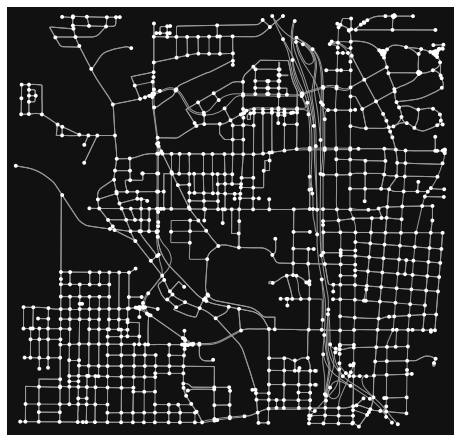

(<Figure size 576x576 with 1 Axes>, <Axes: >)

In [3]:
# Defining the map boundaries 
north, east, south, west = 33.798, -84.378, 33.763, -84.422  
# Downloading the map as a graph object 
G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive')  
# Plotting the map graph 
ox.plot_graph(G)

In [4]:
# Displaying the 3rd node 
list(G.nodes(data=True))[2]

(69097094, {'y': 33.7653268, 'x': -84.3945873, 'street_count': 4})

In [5]:
# Displaying the 1st edge
list(G.edges(data=True))[1]

(69097091,
 69191561,
 {'osmid': 340371475,
  'lanes': '4',
  'name': 'Centennial Olympic Park Drive Northwest',
  'highway': 'tertiary',
  'oneway': False,
  'reversed': True,
  'length': 76.10700000000001,
  'geometry': <LINESTRING (-84.392 33.765, -84.392 33.765, -84.392 33.765, -84.392 33.765)>})

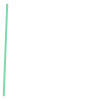

In [6]:
# Displaying the shape of edge using the geometry 
list(G.edges(data=True))[1][2]['geometry']

In [16]:
# define origin and desination locations 
origin_point = (33.787201, -84.405076) 
destination_point = (33.764135, -84.394980)
# get the nearest nodes to the locations 
origin_node = ox.distance.nearest_nodes(G, origin_point[0],origin_point[1]) 
destination_node = ox.distance.nearest_nodes(G, destination_point[0],destination_point[1]) 
# printing the closest node id to origin and destination points origin_node, destination_node

In [18]:
origin_node

69123259

In [24]:
destination_node = 69114062

In [25]:
# Finding the optimal path 
route = nx.shortest_path(G, origin_node, destination_node, weight = 'length') 
route

[69123259,
 69433156,
 69141233,
 69262915,
 69375784,
 69515827,
 69256268,
 69436045,
 69228762,
 69365780,
 69515840,
 69350685,
 69515340,
 69515841,
 69488055,
 69515842,
 69227168,
 69387071,
 69249210,
 69421277,
 2390850312,
 69515873,
 69232977,
 1278546096,
 4229149051,
 69392941,
 69515896,
 69150809,
 69150758,
 69102642,
 69423742,
 9657075285,
 3382299289,
 69616415,
 69114062]

In [31]:
ox.utils_graph.get_route_edge_attributes(G,route)

[{'osmid': [437103197, 337901415],
  'oneway': True,
  'lanes': '7',
  'ref': 'I 75;I 85',
  'name': 'Downtown Connector',
  'highway': 'motorway',
  'maxspeed': '55 mph',
  'reversed': False,
  'length': 342.942,
  'geometry': <LINESTRING (-84.383 33.763, -84.384 33.764, -84.384 33.764, -84.384 33.765,...>},
 {'osmid': 9238587,
  'oneway': True,
  'lanes': '2',
  'highway': 'motorway_link',
  'reversed': False,
  'length': 263.5450000000001,
  'geometry': <LINESTRING (-84.385 33.766, -84.386 33.766, -84.386 33.766, -84.386 33.766,...>},
 {'osmid': 42509020,
  'oneway': True,
  'lanes': '3',
  'name': 'Pine Street Northeast',
  'highway': 'secondary',
  'reversed': False,
  'length': 72.30099999999999,
  'geometry': <LINESTRING (-84.386 33.767, -84.386 33.767, -84.386 33.767, -84.386 33.767,...>},
 {'osmid': 179215365,
  'oneway': False,
  'name': 'Peachtree Street Northeast',
  'highway': 'secondary',
  'reversed': False,
  'length': 133.751,
  'geometry': <LINESTRING (-84.385 33.767,

In [26]:
# getting coordinates of the nodes
# we will store the longitudes and latitudes in following list 
long = [] 
lat = []  
for i in route:
     point = G.nodes[i]
     long.append(point['x'])
     lat.append(point['y'])

In [27]:
def plot_path(lat, long, origin_point, destination_point):
    
    """
    Given a list of latitudes and longitudes, origin 
    and destination point, plots a path on a map
    
    Parameters
    ----------
    lat, long: list of latitudes and longitudes
    origin_point, destination_point: co-ordinates of origin
    and destination
    Returns
    -------
    Nothing. Only shows the map.
    """
    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')))
    # adding source marker
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))
     
    # adding destination marker
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))
    
    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="stamen-terrain",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 13})
    fig.show()

In [28]:
plot_path(lat, long, origin_point, destination_point)